# Machine learning plots

In [1]:
# %%%%%%%% imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plot_misc.machine_learning as ml
import plot_misc.example_data.examples as examples
%matplotlib inline
from IPython.core.display import display

/home/amand/google_drive/Research/plot-misc/plot_misc/table/layout.py:24: FutureWarning: The `layout.py` module will be moved to the `data-clean` package in the near future.
  FutureWarning)


In [2]:
# constants
X_LAB = 'c-statistic change'
LAB_SIZE=14
LAB_PAD=1.2
TICKS_WD = 0.6
TLAB_SIZE = 9
TLEN = 5
VALUES='importance'
LABELS='name'
CMTOINCH = 1/2.54

# import example data
data = examples.load_lollipop_data()
data = data[data[VALUES] > 0]
data.head()

name  importance
0       Height (cm)    0.046065
1        Female sex    0.043915
2  R-axis (degrees)    0.036310
3   History of LTVA    0.027412
4   ECG Embeding 26    0.020835

# Plotting lollipop


(0.0, 0.048247475455820456)

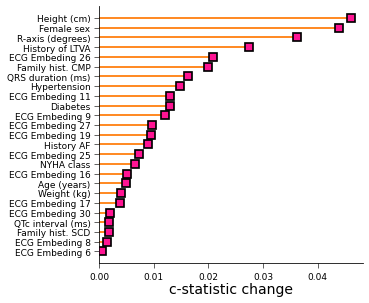

In [3]:
fig, ax = plt.subplots(1, figsize=(12*CMTOINCH, 12*CMTOINCH))

# make plot
_, ax = ml.lollipop(
     values=data[VALUES].to_numpy(), labels=data[LABELS].to_numpy(),
    line_color='tab:orange', linewidth=1.8, dot_color='deeppink', 
    dot_edge_color='black', dot_size=8, dot_edge_size=1.7, reverse_y=True, 
    ax=ax, kwargs_plot_dict={'marker':'s'},
                    )
# labels and ticks
ax.tick_params(axis="x", labelsize=TLAB_SIZE, length=TLEN, width=TICKS_WD,
        rotation=0)
ax.tick_params(axis="y", labelsize=TLAB_SIZE, length=TLEN, width=TICKS_WD,
        rotation=0)
# add lables
ax.set_ylabel('')
ax.set_xlabel(X_LAB, fontsize=LAB_SIZE, labelpad=LAB_PAD)
# limits
xlim = ax.get_xlim()
ax.set_xlim(0, xlim[1]*0.95)

# Plotting calibration

In [4]:
# load data 
data = examples.load_calibration_bins()

# constants
X_LAB = 'Predicted risk'
Y_LAB = 'Observed risk'
LINE_COL = ['lightcoral', 'lightgreen']
LINE_LW = [1.5, 1.5]
LINE_LS = ['--', '--']
DOT_COL = ['lightcoral', 'lightgreen']
DOT_MARK = ['o', 'o']


data.head()

average_predict_risk  average_observed_risk  lower_observed_risk  \
bins                                                                     
0                 0.077704               0.071429             0.008770   
1                 0.158541               0.178571             0.060643   
2                 0.238182               0.285714             0.132237   
3                 0.340155               0.259259             0.111145   
4                 0.468930               0.464286             0.275109   

      upper_observed_risk  no_subjects  
bins                                    
0                0.235035           28  
1                0.368933           28  
2                0.486668           28  
3                0.462849           27  
4                0.661301           28

Text(0.5, 0, 'Predicted risk')

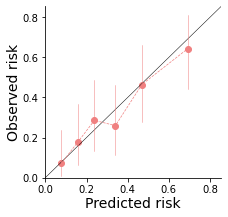

In [5]:
# make figure
fig, ax = plt.subplots(1, figsize=(8*CMTOINCH, 8*CMTOINCH))

# make plot
_, ax = ml.calibration(data, predicted='average_predict_risk', observed='average_observed_risk',
                       lower_observed='lower_observed_risk', upper_observed='upper_observed_risk',
                      ax=ax)
# labels
ax.set_ylabel(Y_LAB, fontsize=LAB_SIZE, labelpad=LAB_PAD)
ax.set_xlabel(X_LAB, fontsize=LAB_SIZE, labelpad=LAB_PAD)

Text(0.5, 0, 'Predicted risk')

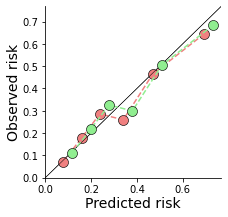

In [6]:
# multiple lines
data2 = data.copy()
data2[['average_predict_risk', 'average_observed_risk']] = \
     data2[['average_predict_risk', 'average_observed_risk']] + 0.04
# making dict
data_dict = {'one': data, 'two': data2}

# make figure
fig, ax = plt.subplots(1, figsize=(8*CMTOINCH, 8*CMTOINCH))

# make plot
_, ax = ml.calibration(data_dict, predicted='average_predict_risk', observed='average_observed_risk',
                       ci_colour=None, ci_linewidth=None, 
                       dot_marker=DOT_MARK, dot_colour=DOT_COL, 
                       line_colour=LINE_COL, line_linestyle=LINE_LS, line_linewidth=LINE_LW,
                       kwargs_dot_dict={'s':100, 'edgecolor':'black', 'linewidths':0.6, 'zorder':2},
                       ax=ax)
# labels
ax.set_ylabel(Y_LAB, fontsize=LAB_SIZE, labelpad=LAB_PAD)
ax.set_xlabel(X_LAB, fontsize=LAB_SIZE, labelpad=LAB_PAD)

In [7]:
help(ml)

Help on module plot_misc.machine_learning in plot_misc:

NAME
    plot_misc.machine_learning - A collection of figure templates relevant for machine learning projects.

DESCRIPTION
    Includes for example code for lollipop graphs or calibration plots.

FUNCTIONS
    calibration(data: Union[pandas.core.frame.DataFrame, Dict[str, pandas.core.frame.DataFrame]], observed: str, predicted: str, lower_observed: Union[NoneType, str] = None, upper_observed: Union[NoneType, str] = None, ci_colour: Union[str, List[str], NoneType] = ['lightcoral'], ci_linewidth: Union[str, List[float], NoneType] = [0.5], dot_marker: Union[str, List[str]] = ['o'], dot_colour: Union[str, List[str]] = ['lightcoral'], line_colour: Union[str, List[str]] = ['lightcoral'], line_linewidth: Union[str, List[float]] = [0.7], line_linestyle: Union[str, List[str]] = ['--'], figsize: Tuple[float, float] = (6, 6), diagonal_colour: str = 'black', diagonal_linewdith: float = 0.5, diagonal_linestyle: str = '-', margins: Tuple[floa